# Import Modules

In [9]:
# Data handling
import os
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Algs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor

# Splitting, Processing, Scaling, Metrics, and More!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# Static Variables

In [10]:
# Paths
base_path = os.getcwd()
train_data = os.path.join(base_path, 'Datasets', 'train.csv')
test_data = os.path.join(base_path, 'Datasets', 'test.csv')

# Load Data
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [11]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# Drop columns that won't be useful
train_df.drop(columns=['Name','Ticket','Cabin'], inplace=True)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# Exploratory Data Analysis / Cleaning

In [13]:
"""
We want to replace Sex values and Embarked values with numbers.
"""
new_sex = train_df['Sex'].replace({'male':0, 'female':1}) #males are 0, females are 1
train_df['Sex'] = new_sex
new_embarked = train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2}) #Pretty self explanatory
train_df['Embarked'] = new_embarked
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,1,NaN,1,2,23.4500,0.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [18]:
train_df.describe(include='all')
# We will have to clean the Age column (over 100 nulls).  
#Embarked isn't missing enough to cause concern; we'll just drop the two rows without values

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [23]:
# To clean the age, we'll just fill null's with the mean
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
# And we'll drop the two rows missing Embarked values
train_df.dropna(subset=['Embarked'],inplace=True)

In [24]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681,0.362205
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [27]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030300,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193,0.043835
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958,0.118593
Age,0.030300,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604,0.009499
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000


# Prep Data for ML

In [28]:
# Separate Features from Target.  We're only going to look at features that had high correlation (>|.1|)
X = train_df[['Pclass','Sex','Fare','Embarked']]
y = train_df['Survived']

In [29]:
# Scale the data
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

In [30]:
###### Apply PCA to dataset
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

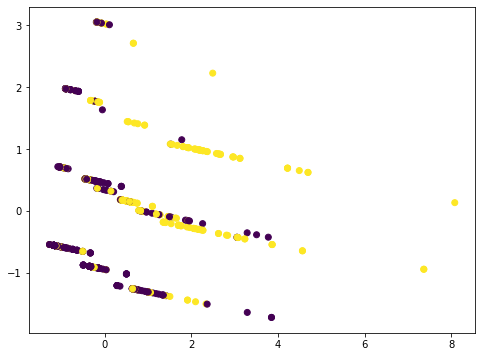

In [31]:
# Quick visualization to see what new components look like, colored by target
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1],c=y)

In [38]:
# Separate into test and train arrays
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.33)

# Try out some ML algs

In [39]:
svc_grid = GridSearchCV(SVC(), {'C':np.arange(0.01,10,0.01), 'gamma':np.arange(0.01,10,0.01)}, n_jobs=-1, verbose=1)
svc_grid.fit(X_train, y_train)

C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 998001 candidates, totalling 2994003 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 3795 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 16295 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 33795 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 56295 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 83795 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 116295 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 153795 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196295 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 243795 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 296295 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 353795 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 416295 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 483795 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]:

KeyboardInterrupt: 

In [42]:
print("SVC Best Params: ",svc_grid.best_params_)
print("SVC Best Score: ", svc_grid.best_score_)

SVC Best Params:  {'C': 0.15000000000000002, 'gamma': 2.7399999999999998}
SVC Best Score:  0.8154362416107382


In [45]:
lsvc_grid = GridSearchCV(LinearSVC(), {'C':np.arange(0.01, 10, 0.01)}, n_jobs=-1, verbose=1)
lsvc_grid.fit(X_train, y_train)

C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 999 candidates, totalling 2997 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2997 out of 2997 | elapsed:    7.6s finished
C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.1...
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])},
             pre_d

In [46]:
print("Linear SVC Best Params: ",lsvc_grid.best_params_)
print("Linear SVC Best Score: ", lsvc_grid.best_score_)

Linear SVC Best Params:  {'C': 4.39}
Linear SVC Best Score:  0.7281879194630873


In [47]:
# Get confusion matrix and classification report
lsvc_predictions = lsvc_grid.predict(X_test)
print("Linear SVC Confusion Matrix:\n", confusion_matrix(y_test, lsvc_predictions))
print("\nLinear SVC Classification Report:\n", classification_report(y_test, lsvc_predictions))

Linear SVC Confusion Matrix:
 [[155  28]
 [ 59  53]]

Linear SVC Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       183
           1       0.65      0.47      0.55       112

    accuracy                           0.71       295
   macro avg       0.69      0.66      0.67       295
weighted avg       0.70      0.71      0.69       295



In [52]:
rfc_grid = GridSearchCV(RandomForestClassifier(), {'max_depth':np.arange(1, 10, 1), 'min_samples_split':np.arange(2,10,1), 'min_samples_leaf':np.arange(2,10,1)}, n_jobs=-1, verbose=1)
rfc_grid.fit(X_train, y_train)

C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:    2.4s finished
C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [54]:
# Get confusion matrix and classification report
rfc_predictions = rfc_grid.predict(X_test)
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, rfc_predictions))
print("\nRandom Forest Classifier Report:\n", classification_report(y_test, rfc_predictions))

Random Forest Classifier Confusion Matrix:
 [[156  27]
 [ 43  69]]

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.82       183
           1       0.72      0.62      0.66       112

    accuracy                           0.76       295
   macro avg       0.75      0.73      0.74       295
weighted avg       0.76      0.76      0.76       295

